# About Data

ID
* This is a unique identifier of the accident record.

Severity
* Shows the severity of the accident, a number between 1 and 4, where 1 indicates the least impact on traffic (i.e., short delay.

Start_Time
* Shows start time of the accident in local time zone.

End_Time
* Shows end time of the accident in local time zone. End time here refers to when the impact of accident on traffic flow was dismissed.

Start_Lat
* Shows latitude in GPS coordinate of the start point.

Start_Lng
* Shows longitude in GPS coordinate of the start point.

End_Lat
* Shows latitude in GPS coordinate of the end point.

End_Lng
* Shows longitude in GPS coordinate of the end point.

Distance(mi)
* The length of the road extent affected by the accident.

Description
* Shows a human provided description of the accident.

Number
* Shows the street number in address field.

Street
* Shows the street name in address field.

Side
* Shows the relative side of the street (Right/Left) in address field.

City
* Shows the city in address field.

County
* Shows the county in address field.

State
* Shows the state in address field.

Zipcode
* Shows the zipcode in address field.

Country
* Shows the country in address field.

Timezone
* Shows timezone based on the location of the accident (eastern, central, etc.).

Airport_Code
* Denotes an airport-based weather station which is the closest one to location of the accident.

Weather_Timestamp
* Shows the time-stamp of weather observation record (in local time).

Temperature(F)
* Shows the temperature (in Fahrenheit).

Wind_Chill(F)
* Shows the wind chill (in Fahrenheit).

Humidity(%)
* Shows the humidity (in percentage).

Pressure(in)
* Shows the air pressure (in inches).

Visibility(mi)
* Shows visibility (in miles).

Wind_Direction
* Shows wind direction.

Wind_Speed(mph)
* Shows wind speed (in miles per hour).

Precipitation(in)
* Shows precipitation amount in inches, if there is any.

Weather_Condition
* Shows the weather condition (rain, snow, thunderstorm, fog, etc.)

Amenity
* A POI annotation which indicates presence of amenity in a nearby location.

Bump
* A POI annotation which indicates presence of speed bump or hump in a nearby location.

Crossing
* A POI annotation which indicates presence of crossing in a nearby location.

Give_Way
* A POI annotation which indicates presence of give_way in a nearby location.

Junction
* A POI annotation which indicates presence of junction in a nearby location.

No_Exit
* A POI annotation which indicates presence of no_exit in a nearby location.

Railway
* A POI annotation which indicates presence of railway in a nearby location.

Roundabout
* A POI annotation which indicates presence of roundabout in a nearby location.

Station
* A POI annotation which indicates presence of station in a nearby location.

Stop
* A POI annotation which indicates presence of stop in a nearby location.

Traffic_Calming
* A POI annotation which indicates presence of traffic_calming in a nearby location.

Traffic_Signal
* A POI annotation which indicates presence of traffic_signal in a nearby location.

Turning_Loop
* A POI annotation which indicates presence of turning_loop in a nearby location.

Sunrise_Sunset
* Shows the period of day (i.e. day or night) based on sunrise/sunset.

Civil_Twilight
* Shows the period of day (i.e. day or night) based on civil twilight.

Nautical_Twilight
* Shows the period of day (i.e. day or night) based on nautical twilight.

Astronomical_Twilight
* Shows the period of day (i.e. day or night) based on astronomical twilight.




In [3]:
!pip install pyspark

# Import Libraries

In [4]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import col, isnull, count, when, mean
from pyspark.sql.types import IntegerType, FloatType

# Start Spark session
spark = SparkSession.builder.appName("US_Accidents_Analysis").getOrCreate()


# Load dataset

In [5]:
# Load dataset into a PySpark DataFrame
df = spark.read.csv("USA.csv", header=True, inferSchema=True)

# Explore data

In [6]:
df.show(3)

+---------+-------+--------+-------------------+-------------------+-----------+-------------+-----------+-------------+------------+--------------------+----------------+--------+----------------+-----+----------+-------+----------+------------+-------------------+--------------+-------------+-----------+------------+--------------+--------------+---------------+-----------------+-----------------+-------+-----+--------+--------+--------+-------+-------+----------+-------+-----+---------------+--------------+------------+--------------+--------------+-----------------+---------------------+
|       ID| Source|Severity|         Start_Time|           End_Time|  Start_Lat|    Start_Lng|    End_Lat|      End_Lng|Distance(mi)|         Description|          Street|    City|          County|State|   Zipcode|Country|  Timezone|Airport_Code|  Weather_Timestamp|Temperature(F)|Wind_Chill(F)|Humidity(%)|Pressure(in)|Visibility(mi)|Wind_Direction|Wind_Speed(mph)|Precipitation(in)|Weather_Condition

In [7]:
df.columns

['ID',
 'Source',
 'Severity',
 'Start_Time',
 'End_Time',
 'Start_Lat',
 'Start_Lng',
 'End_Lat',
 'End_Lng',
 'Distance(mi)',
 'Description',
 'Street',
 'City',
 'County',
 'State',
 'Zipcode',
 'Country',
 'Timezone',
 'Airport_Code',
 'Weather_Timestamp',
 'Temperature(F)',
 'Wind_Chill(F)',
 'Humidity(%)',
 'Pressure(in)',
 'Visibility(mi)',
 'Wind_Direction',
 'Wind_Speed(mph)',
 'Precipitation(in)',
 'Weather_Condition',
 'Amenity',
 'Bump',
 'Crossing',
 'Give_Way',
 'Junction',
 'No_Exit',
 'Railway',
 'Roundabout',
 'Station',
 'Stop',
 'Traffic_Calming',
 'Traffic_Signal',
 'Turning_Loop',
 'Sunrise_Sunset',
 'Civil_Twilight',
 'Nautical_Twilight',
 'Astronomical_Twilight']

Number of columns

In [8]:
len(df.columns)

46

Number of rows

In [9]:
df.count()

500000

In [10]:
df.printSchema()

root
 |-- ID: string (nullable = true)
 |-- Source: string (nullable = true)
 |-- Severity: integer (nullable = true)
 |-- Start_Time: timestamp (nullable = true)
 |-- End_Time: timestamp (nullable = true)
 |-- Start_Lat: double (nullable = true)
 |-- Start_Lng: double (nullable = true)
 |-- End_Lat: double (nullable = true)
 |-- End_Lng: double (nullable = true)
 |-- Distance(mi): double (nullable = true)
 |-- Description: string (nullable = true)
 |-- Street: string (nullable = true)
 |-- City: string (nullable = true)
 |-- County: string (nullable = true)
 |-- State: string (nullable = true)
 |-- Zipcode: string (nullable = true)
 |-- Country: string (nullable = true)
 |-- Timezone: string (nullable = true)
 |-- Airport_Code: string (nullable = true)
 |-- Weather_Timestamp: timestamp (nullable = true)
 |-- Temperature(F): double (nullable = true)
 |-- Wind_Chill(F): double (nullable = true)
 |-- Humidity(%): double (nullable = true)
 |-- Pressure(in): double (nullable = true)
 |-- V

In [11]:
df.describe().show()

+-------+---------+-------+------------------+------------------+------------------+-----------------+------------------+------------------+--------------------+---------+----------+---------+------+-----------------+-------+----------+------------+-----------------+-----------------+-----------------+------------------+-----------------+--------------+------------------+--------------------+------------------+--------------+--------------+-----------------+---------------------+
|summary|       ID| Source|          Severity|         Start_Lat|         Start_Lng|          End_Lat|           End_Lng|      Distance(mi)|         Description|   Street|      City|   County| State|          Zipcode|Country|  Timezone|Airport_Code|   Temperature(F)|    Wind_Chill(F)|      Humidity(%)|      Pressure(in)|   Visibility(mi)|Wind_Direction|   Wind_Speed(mph)|   Precipitation(in)| Weather_Condition|Sunrise_Sunset|Civil_Twilight|Nautical_Twilight|Astronomical_Twilight|
+-------+---------+-------+---

Number of numeric columns in our data

In [12]:
from pyspark.sql.types import DoubleType, LongType
numeric_columns = [field.name for field in df.schema.fields if isinstance(field.dataType, (IntegerType, FloatType, DoubleType, LongType))]
numeric_df = df.select(numeric_columns)
len(numeric_df.columns)


13

Check the number of null values per column

In [13]:
df.select([count(when(isnull(c), c)).alias(c) for c in df.columns]).show()

+---+------+--------+----------+--------+---------+---------+-------+-------+------------+-----------+------+----+------+-----+-------+-------+--------+------------+-----------------+--------------+-------------+-----------+------------+--------------+--------------+---------------+-----------------+-----------------+-------+----+--------+--------+--------+-------+-------+----------+-------+----+---------------+--------------+------------+--------------+--------------+-----------------+---------------------+
| ID|Source|Severity|Start_Time|End_Time|Start_Lat|Start_Lng|End_Lat|End_Lng|Distance(mi)|Description|Street|City|County|State|Zipcode|Country|Timezone|Airport_Code|Weather_Timestamp|Temperature(F)|Wind_Chill(F)|Humidity(%)|Pressure(in)|Visibility(mi)|Wind_Direction|Wind_Speed(mph)|Precipitation(in)|Weather_Condition|Amenity|Bump|Crossing|Give_Way|Junction|No_Exit|Railway|Roundabout|Station|Stop|Traffic_Calming|Traffic_Signal|Turning_Loop|Sunrise_Sunset|Civil_Twilight|Nautical_Twil

Percentage of missing values per column (if any)


In [14]:
total_count = df.count()
missing_percentage = df.select([(count(when(isnull(c), c)) / total_count * 100).alias(c) for c in df.columns])
missing_percentage.show()

+---+------+--------+----------+--------+---------+---------+------------------+------------------+------------+--------------------+------+--------------------+------+-----+-------+-------+-------------------+------------+------------------+--------------+-------------+-----------+------------+--------------+------------------+---------------+-----------------+-----------------+-------+----+--------+--------+--------+-------+-------+----------+-------+----+---------------+--------------+------------+--------------+--------------+-----------------+---------------------+
| ID|Source|Severity|Start_Time|End_Time|Start_Lat|Start_Lng|           End_Lat|           End_Lng|Distance(mi)|         Description|Street|                City|County|State|Zipcode|Country|           Timezone|Airport_Code| Weather_Timestamp|Temperature(F)|Wind_Chill(F)|Humidity(%)|Pressure(in)|Visibility(mi)|    Wind_Direction|Wind_Speed(mph)|Precipitation(in)|Weather_Condition|Amenity|Bump|Crossing|Give_Way|Junction|N

Barplot for percentage of the missing values

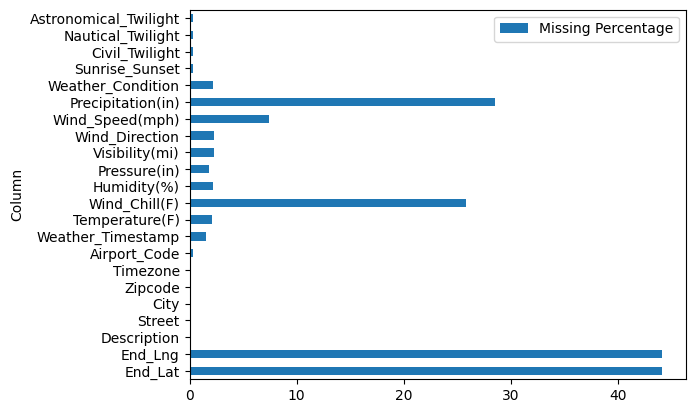

In [15]:
import matplotlib.pyplot as plt

missing_pd = missing_percentage.toPandas().T.reset_index()
missing_pd.columns = ['Column', 'Missing Percentage']

missing_pd = missing_pd[missing_pd['Missing Percentage'] != 0]

missing_pd.plot(kind='barh', x='Column', y='Missing Percentage')
plt.show()


# Data Cleaning

Drop 2 columns[End_Lat,End_Lng] with high number of missing values and mostly irrelevant.

Drop rows w.r.t columns having least percentage of missing values does not effect much to our data

In [16]:
new_data_a = df.drop("End_Lat", "End_Lng")

new_data_b = new_data_a.dropna(subset=['Visibility(mi)', 'Weather_Condition', 'Humidity(%)',
                                       'Temperature(F)', 'Wind_Direction', 'Pressure(in)',
                                       'Weather_Timestamp', 'Airport_Code', 'Timezone',
                                       'Zipcode', 'Sunrise_Sunset', 'Civil_Twilight',
                                       'Nautical_Twilight', 'Astronomical_Twilight',
                                       'City', 'Description', 'Street'])

dataf = new_data_b.drop("ID")

Fill important numeric fields with the mean value.

In [17]:
from pyspark.sql import functions as F
from pyspark.sql import Window

# Define a window specification
window_spec = Window.unboundedPreceding

# Calculate mean values
mean_wind_chill = dataf.select(F.mean(col("Wind_Chill(F)"))).first()[0]
mean_precipitation = dataf.select(F.mean(col("Precipitation(in)"))).first()[0]
mean_wind_speed = dataf.select(F.mean(col("Wind_Speed(mph)"))).first()[0]

# Fill null values with the respective means
dataf = dataf.withColumn("Wind_Chill(F)", when(isnull(col("Wind_Chill(F)")), mean_wind_chill).otherwise(col("Wind_Chill(F)")))
dataf = dataf.withColumn("Precipitation(in)", when(isnull(col("Precipitation(in)")), mean_precipitation).otherwise(col("Precipitation(in)")))
dataf = dataf.withColumn("Wind_Speed(mph)", when(isnull(col("Wind_Speed(mph)")), mean_wind_speed).otherwise(col("Wind_Speed(mph)")))


Check for all no missing data in final_data

In [18]:
dataf.select([count(when(isnull(c), c)).alias(c) for c in dataf.columns]).show()

+------+--------+----------+--------+---------+---------+------------+-----------+------+----+------+-----+-------+-------+--------+------------+-----------------+--------------+-------------+-----------+------------+--------------+--------------+---------------+-----------------+-----------------+-------+----+--------+--------+--------+-------+-------+----------+-------+----+---------------+--------------+------------+--------------+--------------+-----------------+---------------------+
|Source|Severity|Start_Time|End_Time|Start_Lat|Start_Lng|Distance(mi)|Description|Street|City|County|State|Zipcode|Country|Timezone|Airport_Code|Weather_Timestamp|Temperature(F)|Wind_Chill(F)|Humidity(%)|Pressure(in)|Visibility(mi)|Wind_Direction|Wind_Speed(mph)|Precipitation(in)|Weather_Condition|Amenity|Bump|Crossing|Give_Way|Junction|No_Exit|Railway|Roundabout|Station|Stop|Traffic_Calming|Traffic_Signal|Turning_Loop|Sunrise_Sunset|Civil_Twilight|Nautical_Twilight|Astronomical_Twilight|
+------+----

# EDA

Making a Pandas DataFrame to perform EDA easily

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

# Convert the PySpark DataFrame to a pandas DataFrame
pandas_df = dataf.toPandas()


Peak Hour Analysis

<ipython-input-20-2bb4e35575c6>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="Hour", data=pandas_df, palette="icefire_r")


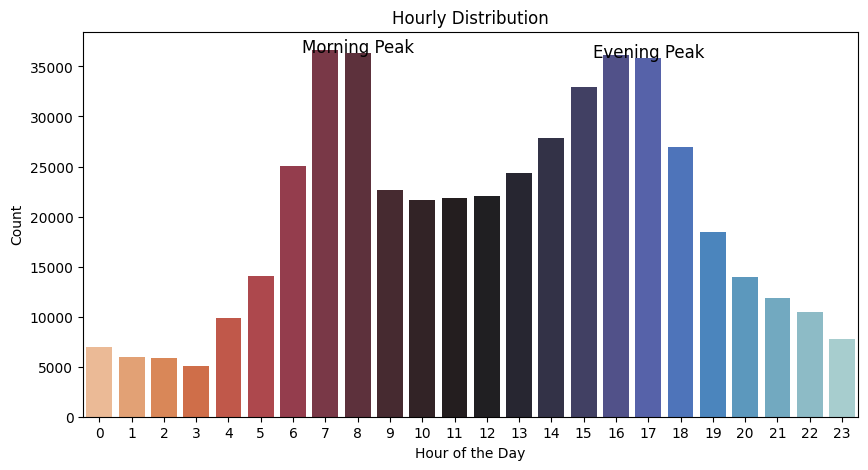

In [20]:
pandas_df['Hour'] = pandas_df['Start_Time'].dt.hour

# Create the plot
fig, ax = plt.subplots(figsize=(10, 5))
sns.countplot(x="Hour", data=pandas_df, palette="icefire_r")

# Calculate peak counts
morning_peak_count = pandas_df[pandas_df['Hour'] == 8].shape[0]
evening_peak_count = pandas_df[pandas_df['Hour'] == 17].shape[0]

# Annotate morning peak
plt.annotate('Morning Peak', xy=(8, morning_peak_count),
             xytext=(8, morning_peak_count + 55),
             fontsize=12, ha='center')

# Annotate evening peak
plt.annotate('Evening Peak', xy=(17, evening_peak_count),
             xytext=(17, evening_peak_count + 55),
             fontsize=12, ha='center')


# Show the plot
plt.title("Hourly Distribution")
plt.xlabel("Hour of the Day")
plt.ylabel("Count")
plt.show()


Severity Based Analysis of Accidents

<ipython-input-21-dd6bf12a0dd4>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  c = sns.countplot(x="Severity", data=pandas_df, palette="crest_r")


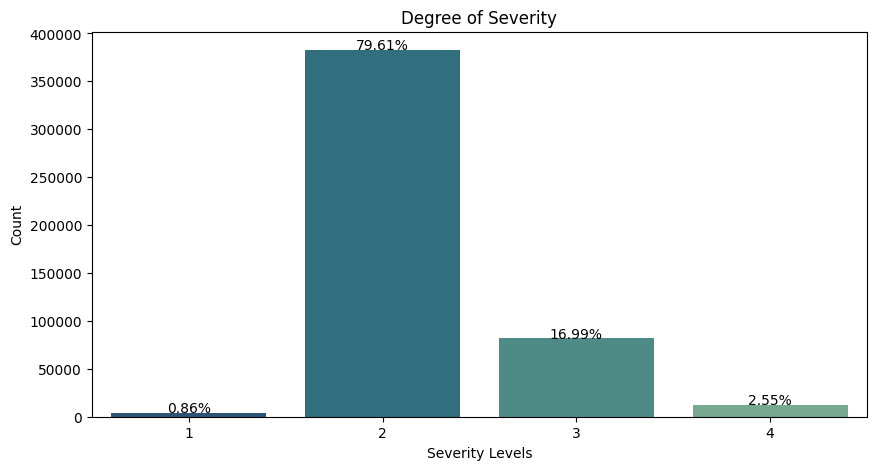

In [21]:
# Create the plot
fig, ax = plt.subplots(figsize=(10, 5))
c = sns.countplot(x="Severity", data=pandas_df, palette="crest_r")
c.set_title("Degree of Severity")

# Total count for percentage calculation
total_count = len(pandas_df)

# Annotate each bar with the percentage
for i in ax.patches:
    count = "{:.2%}".format(i.get_height() / total_count)
    x = i.get_x() + i.get_width() / 2
    y = i.get_height() + 200
    ax.annotate(count, (x, y), ha='center', fontsize=10)

# Show the plot
plt.xlabel("Severity Levels")
plt.ylabel("Count")
plt.show()


Geospatial Analysis

In [22]:
import folium
from folium.plugins import HeatMap

# Filter data to focus on relevant columns for location-based analysis
location_data = pandas_df[["Start_Lat","Start_Lng"]]

# Generate the base map centered on the average location
center_lat = location_data["Start_Lat"].mean()
center_lng = location_data["Start_Lng"].mean()

# Create a folium map centered around the mean latitude and longitude
m = folium.Map(location=[center_lat, center_lng], zoom_start=6)

# Create a list of locations for the heatmap
heat_data = [[row['Start_Lat'], row['Start_Lng']] for index, row in location_data.iterrows()]

# Add the heatmap to the map
HeatMap(heat_data).add_to(m)

# Save the map as an HTML file
m.save("accident_heatmap.html")

# Display the map (if running in a Jupyter notebook or a similar environment)
m


Output hidden; open in https://colab.research.google.com to view.

<Figure size 800x600 with 0 Axes>

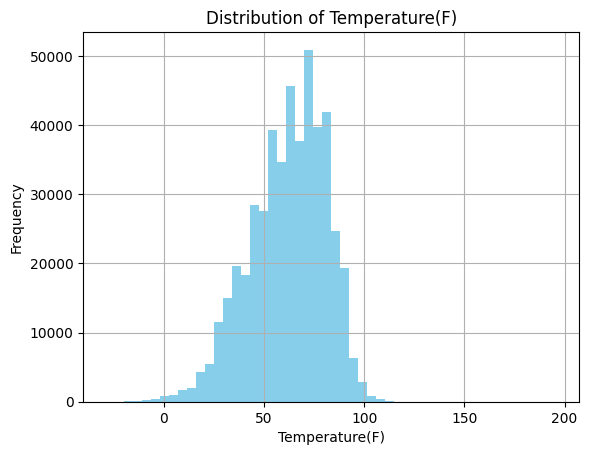

<Figure size 800x600 with 0 Axes>

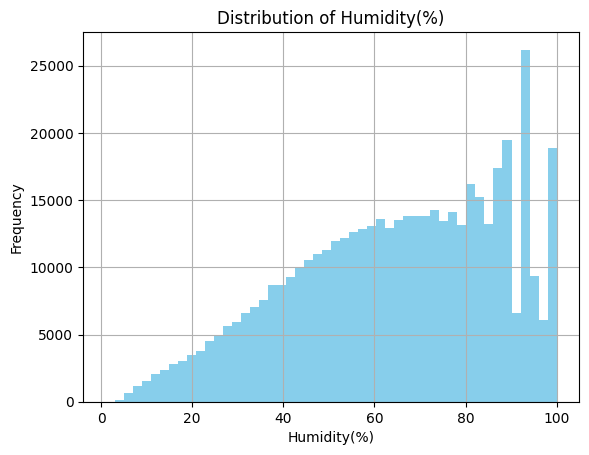

<Figure size 800x600 with 0 Axes>

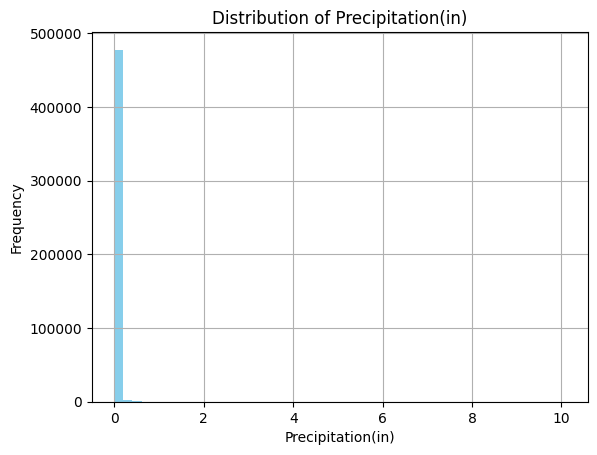

In [23]:
weather_features = ['Temperature(F)', 'Humidity(%)', 'Precipitation(in)']

for feature in weather_features:
    plt.figure(figsize=(8,6))
    dataf.select(feature).toPandas().hist(column=feature, bins=50, color='skyblue')
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')
    plt.show()


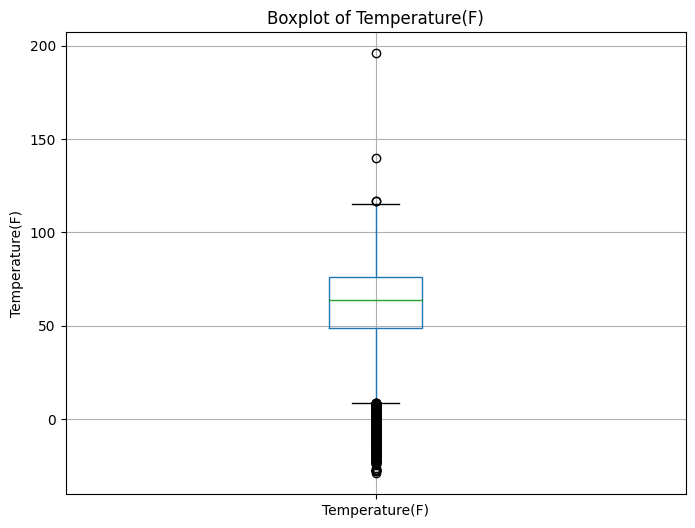

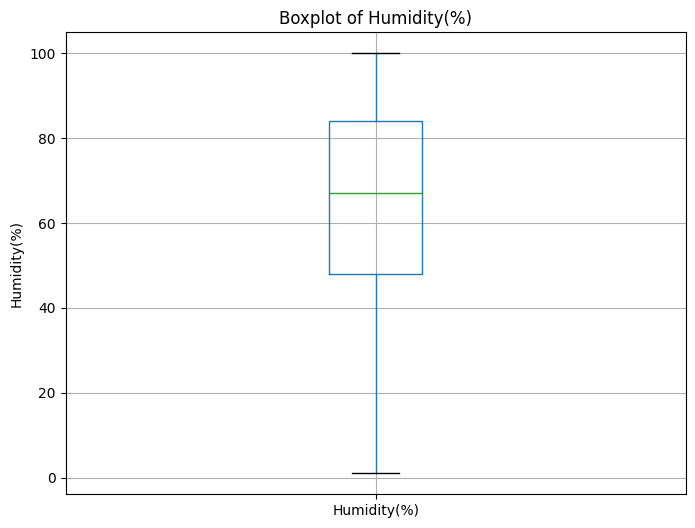

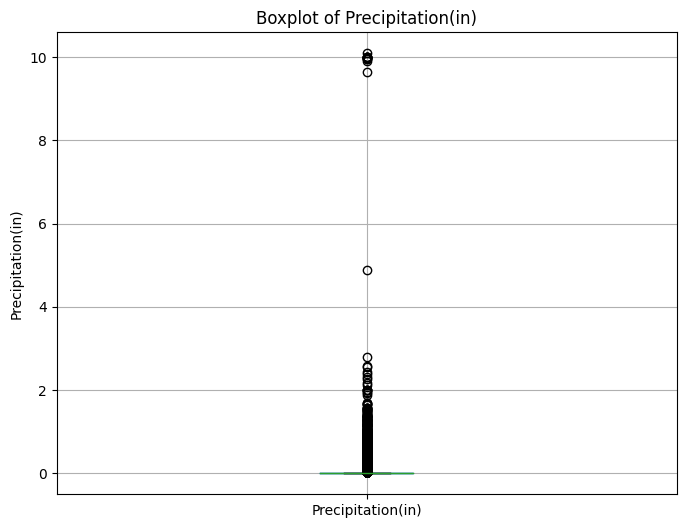

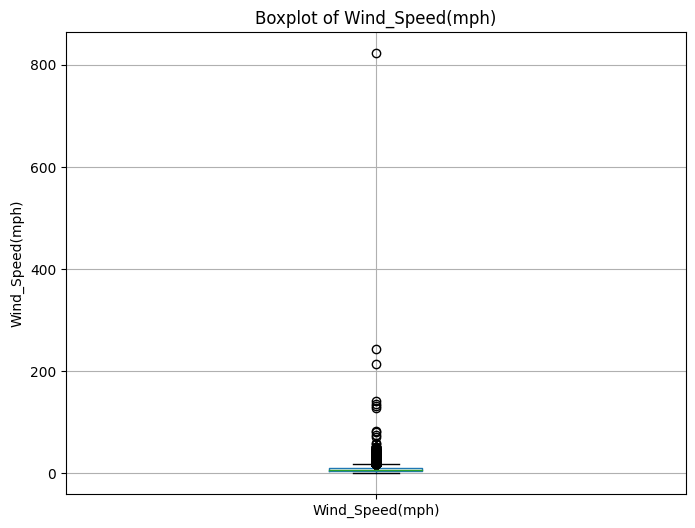

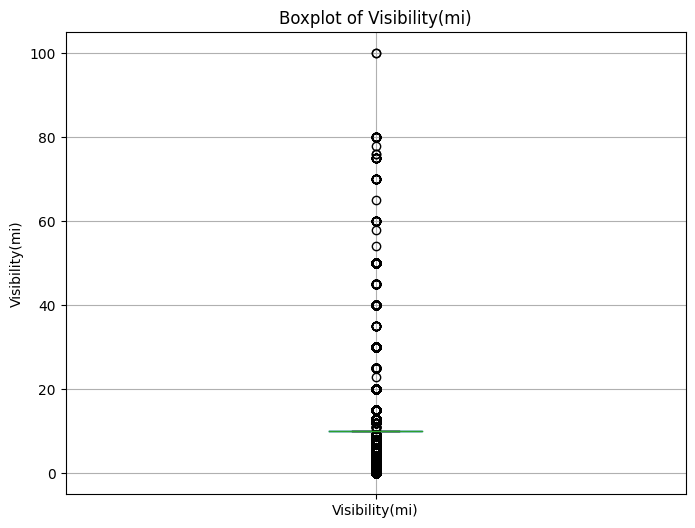

In [24]:
numeric_columns = ['Temperature(F)', 'Humidity(%)', 'Precipitation(in)', 'Wind_Speed(mph)', 'Visibility(mi)']

for column in numeric_columns:
    plt.figure(figsize=(8,6))
    dataf.select(column).toPandas().boxplot(column=column)
    plt.title(f'Boxplot of {column}')
    plt.ylabel(column)
    plt.show()


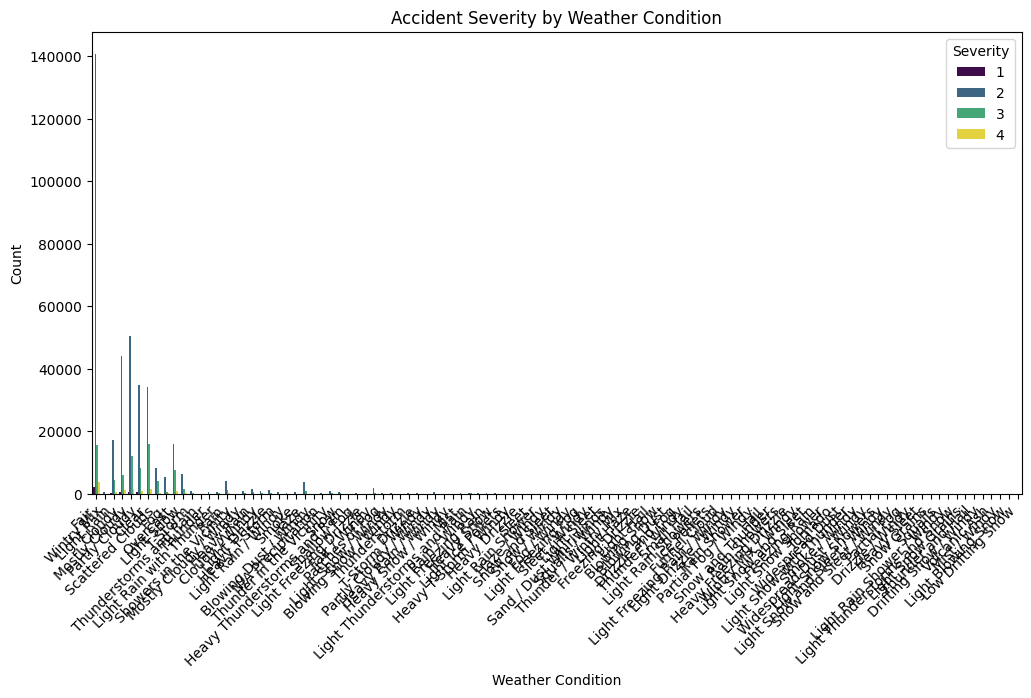

<ipython-input-25-807056bdcd02>:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Severity", y="Temperature(F)", data=pandas_df, ax=axes[0], palette="magma")
<ipython-input-25-807056bdcd02>:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Severity", y="Visibility(mi)", data=pandas_df, ax=axes[1], palette="magma")
<ipython-input-25-807056bdcd02>:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Severity", y="Wind_Speed(mph)", data=pandas_df, ax=axes[2], palette="magma")


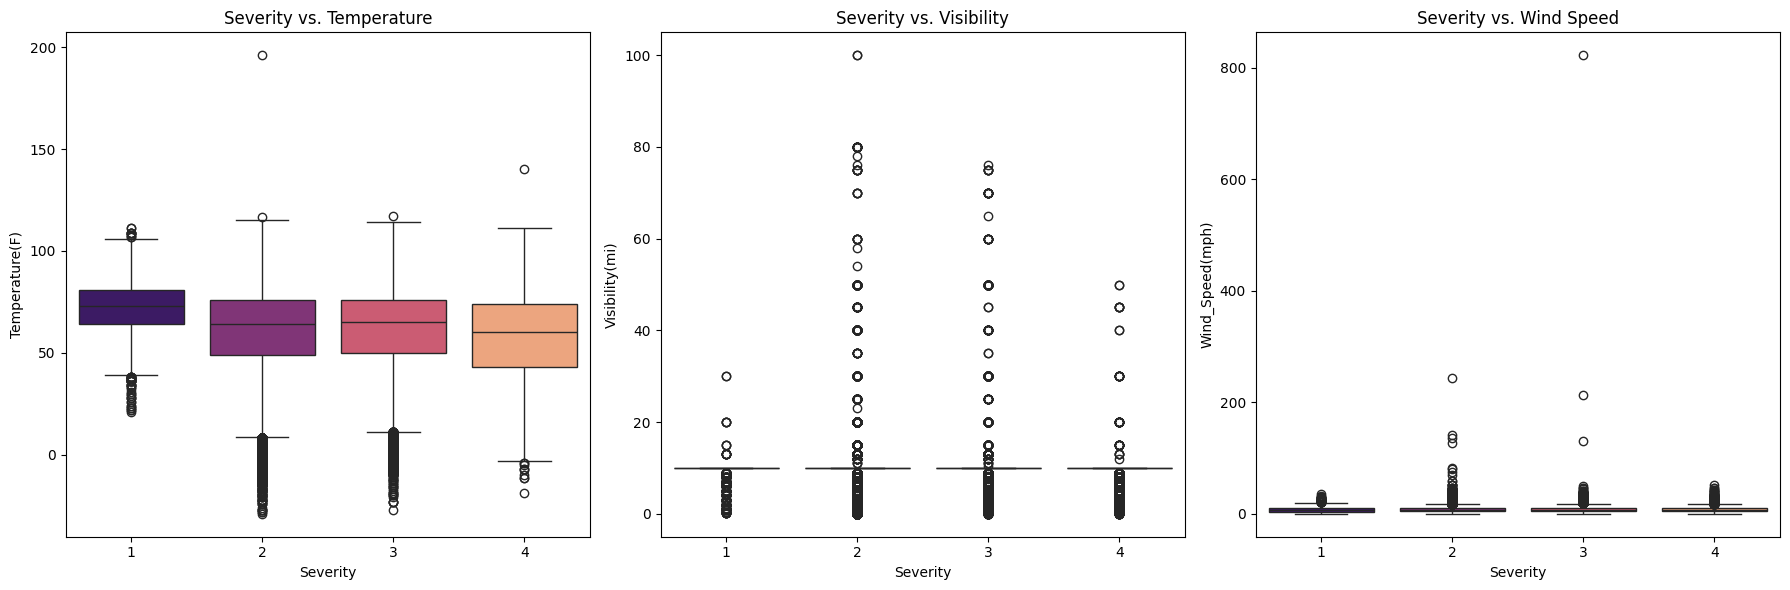

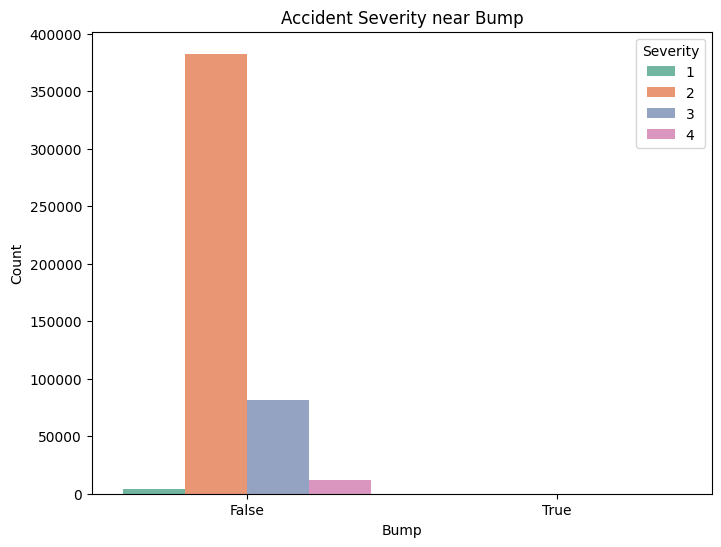

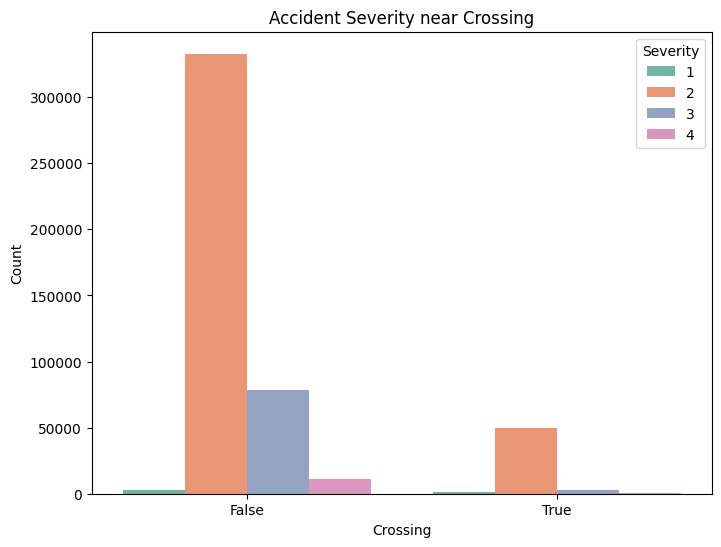

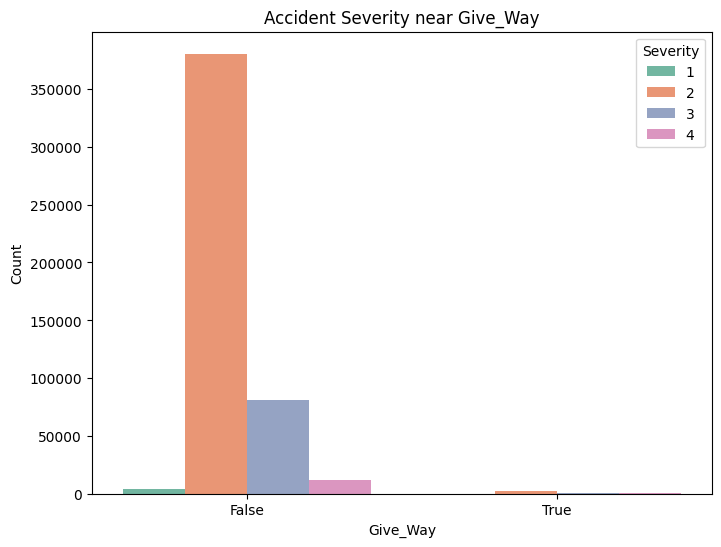

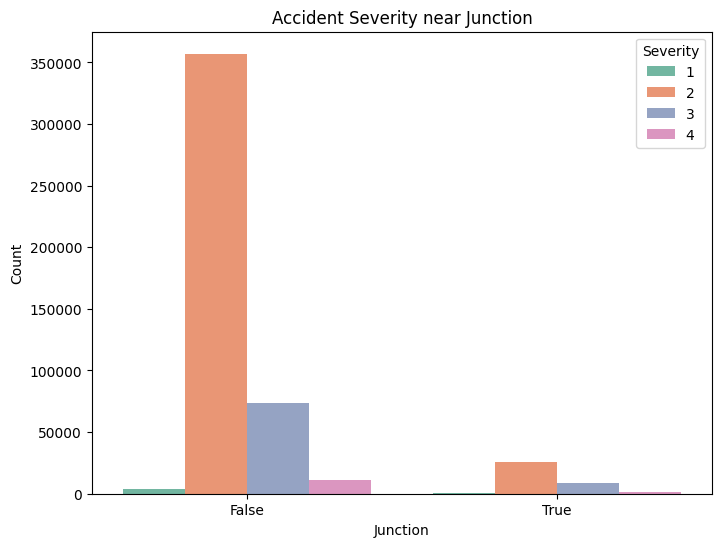

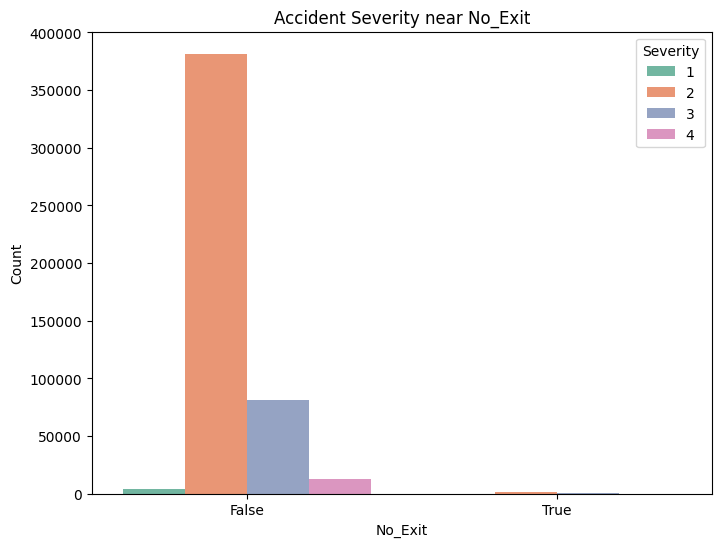

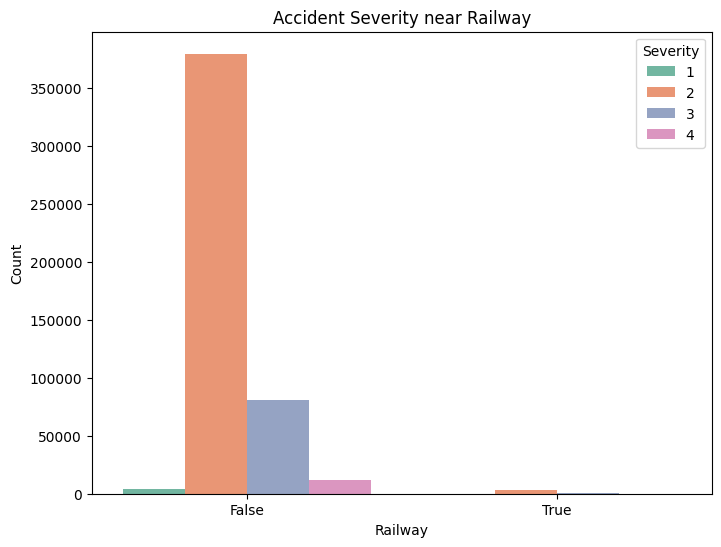

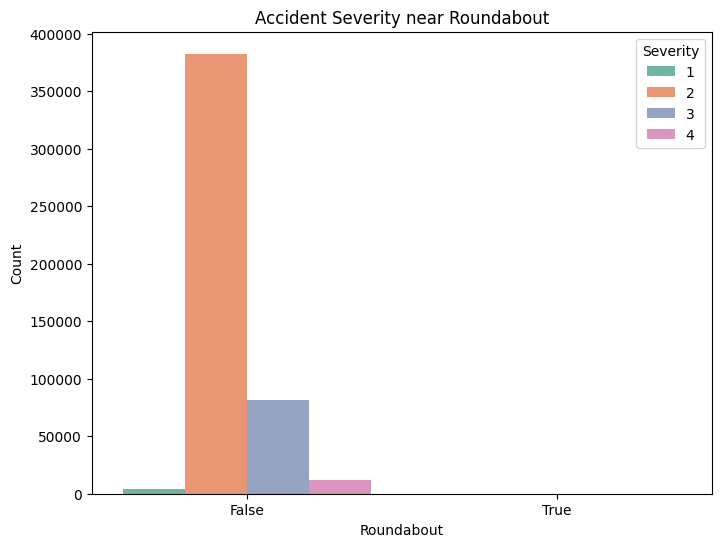

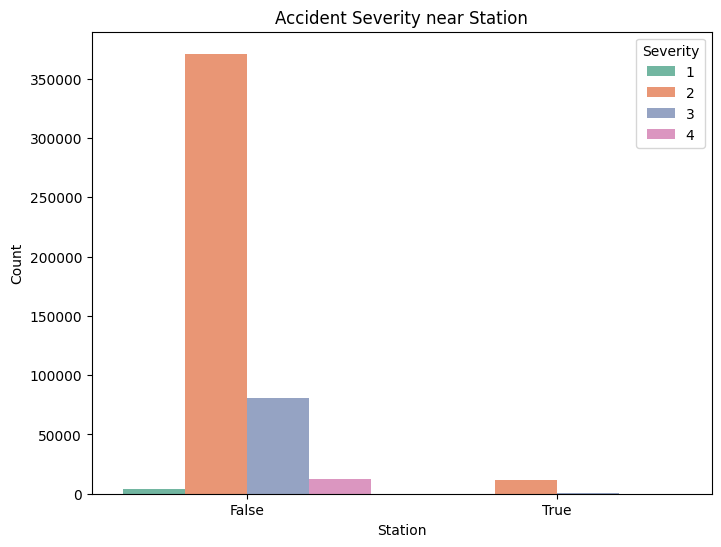

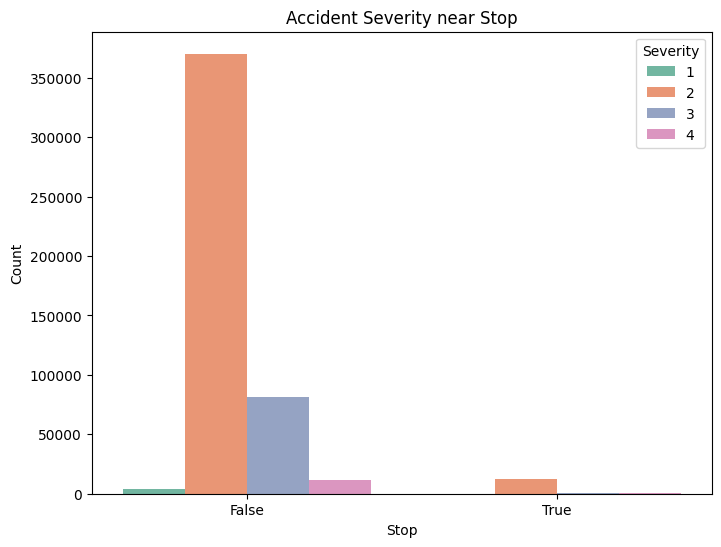

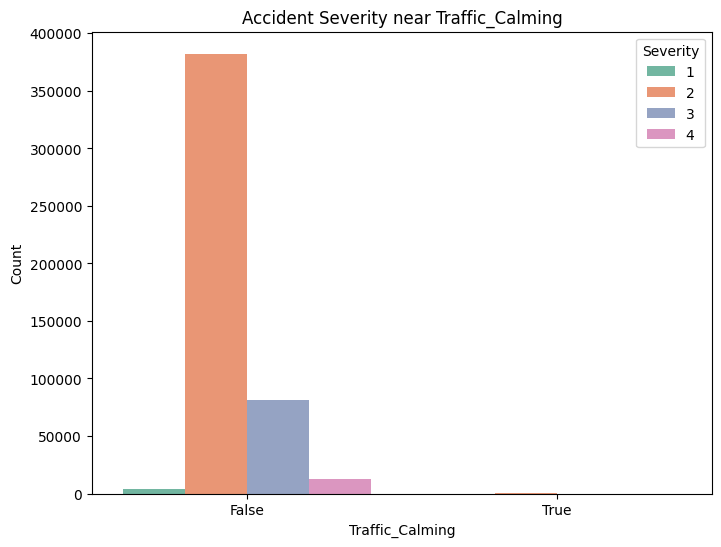

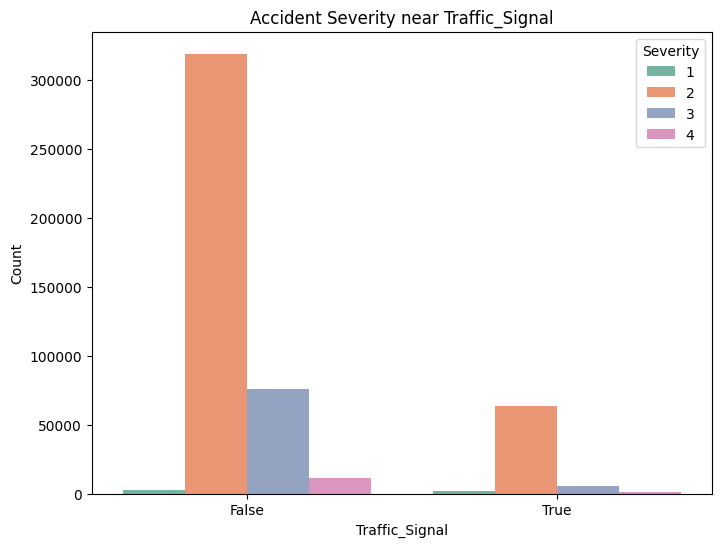

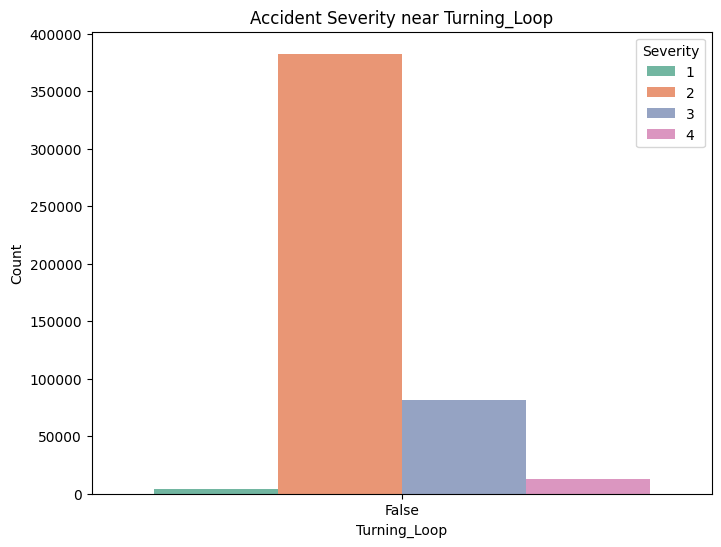

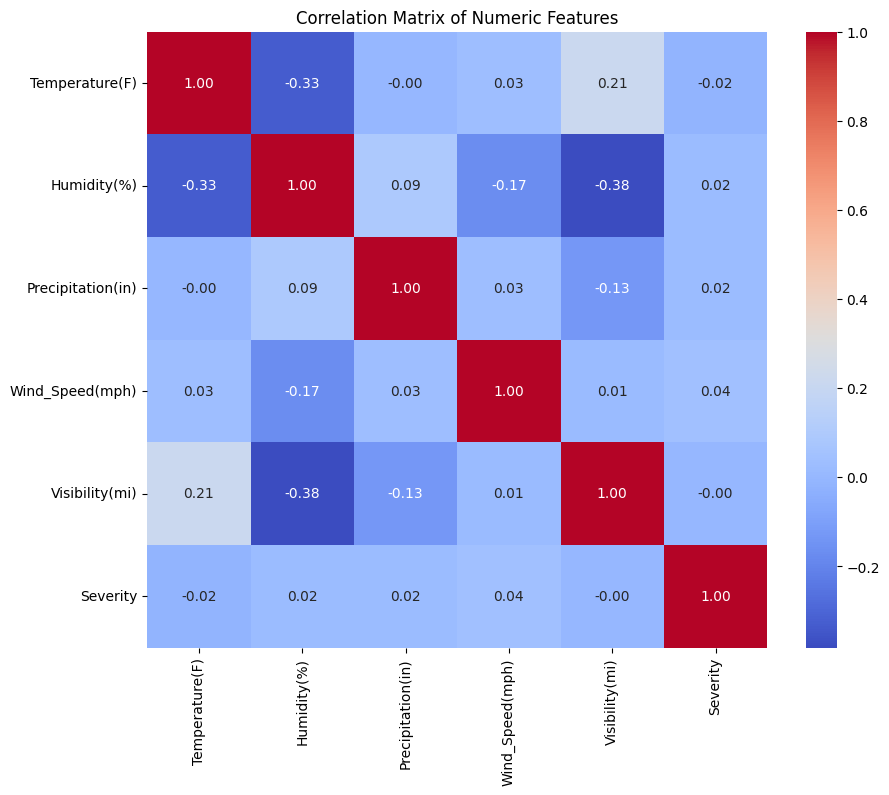

In [25]:
# Bivariate/Multivariate Analysis

# --- Severity vs. Weather Condition ---
plt.figure(figsize=(12, 6))
sns.countplot(x="Weather_Condition", hue="Severity", data=pandas_df, palette="viridis")
plt.title("Accident Severity by Weather Condition")
plt.xlabel("Weather Condition")
plt.ylabel("Count")
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.legend(title="Severity")
plt.show()

# --- Severity vs. Temperature, Visibility, Wind Speed ---
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Severity vs. Temperature
sns.boxplot(x="Severity", y="Temperature(F)", data=pandas_df, ax=axes[0], palette="magma")
axes[0].set_title("Severity vs. Temperature")

# Severity vs. Visibility
sns.boxplot(x="Severity", y="Visibility(mi)", data=pandas_df, ax=axes[1], palette="magma")
axes[1].set_title("Severity vs. Visibility")

# Severity vs. Wind Speed
sns.boxplot(x="Severity", y="Wind_Speed(mph)", data=pandas_df, ax=axes[2], palette="magma")
axes[2].set_title("Severity vs. Wind Speed")

plt.tight_layout()
plt.show()

# --- Severity vs. Road Features ---
road_features = ['Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit', 'Railway', 'Roundabout', 'Station', 'Stop', 'Traffic_Calming', 'Traffic_Signal', 'Turning_Loop']

for feature in road_features:
    plt.figure(figsize=(8, 6))
    sns.countplot(x=feature, hue="Severity", data=pandas_df, palette="Set2")
    plt.title(f"Accident Severity near {feature}")
    plt.xlabel(feature)
    plt.ylabel("Count")
    plt.legend(title="Severity")
    plt.show()

# --- Correlation Matrix (Numeric Features) ---
correlation_matrix = pandas_df[numeric_columns + ['Severity']].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix of Numeric Features")
plt.show()

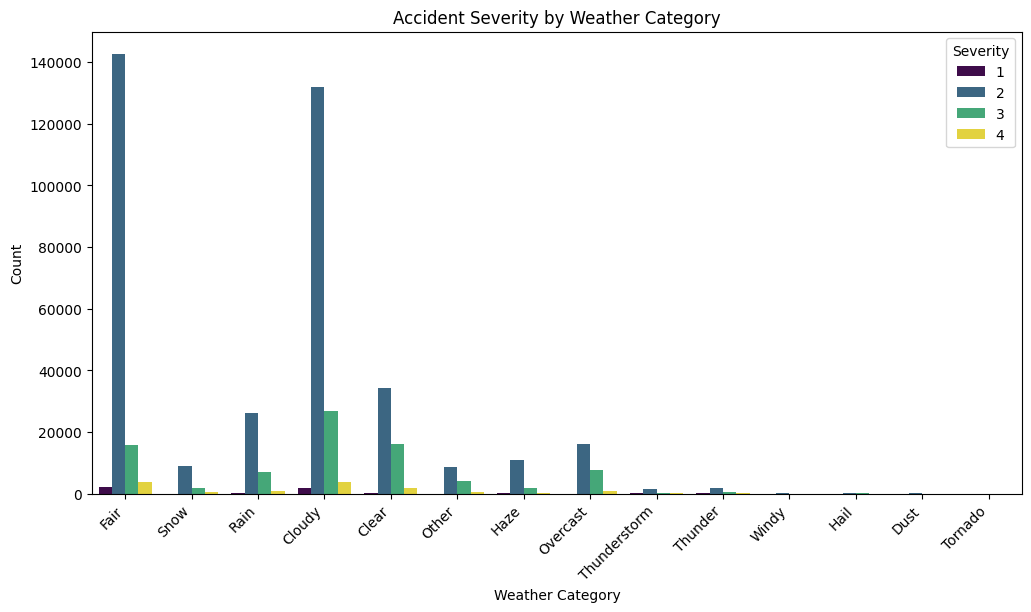

In [26]:
def categorize_weather(row):
    weather_condition = row['Weather_Condition'].lower()  # Convert to lowercase
    precipitation = row['Precipitation(in)']
    visibility = row['Visibility(mi)']
    wind_speed = row['Wind_Speed(mph)']
    # ... (other weather-related columns) ...

    if 'fair' in weather_condition:  # Case-insensitive comparison
        return 'Fair'
    elif 'cloudy' in weather_condition:
        return 'Cloudy'
    elif 'clear' in weather_condition:
        return 'Clear'
    elif 'overcast' in weather_condition:
        return 'Overcast'
    elif any(keyword in weather_condition for keyword in ['snow', 'wintry', 'sleet']): # Lowercase keywords
        return 'Snow'
    elif any(keyword in weather_condition for keyword in ['smoke', 'fog', 'mist', 'haze']):
        return 'Haze'
    elif any(keyword in weather_condition for keyword in ['rain', 'drizzle', 'showers']):
        return 'Rain'
    elif any(keyword in weather_condition for keyword in ['thunderstorms', 't-storm']):
        return 'Thunderstorm'
    elif any(keyword in weather_condition for keyword in ['windy', 'squalls']):
        return 'Windy'
    elif any(keyword in weather_condition for keyword in ['hail', 'ice pellets']):
        return 'Hail'
    elif 'thunder' in weather_condition:
        return 'Thunder'
    elif 'dust' in weather_condition:
        return 'Dust'
    elif 'tornado' in weather_condition:
        return 'Tornado'
    else:
        return 'Other'

# Apply the function and create the 'Weather_Category' column
pandas_df['Weather_Category'] = pandas_df.apply(categorize_weather, axis=1)

# Example of bivariate analysis with the new category
plt.figure(figsize=(12, 6))
sns.countplot(x="Weather_Category", hue="Severity", data=pandas_df, palette="viridis")
plt.title("Accident Severity by Weather Category")
plt.xlabel("Weather Category")
plt.ylabel("Count")
plt.xticks(rotation=45, ha='right')
plt.legend(title="Severity")
plt.show()

In [27]:
#########################################################

In [28]:
import numpy as np
import pandas as pd

def categorize_weather(row):
    weather_condition = row['Weather_Condition'].lower()
    precipitation = row['Precipitation(in)']
    visibility = row['Visibility(mi)']
    wind_speed = row['Wind_Speed(mph)']
    wind_chill = row['Wind_Chill(F)']
    temperature = row['Temperature(F)']
    humidity = row['Humidity(%)']

    # --- Categorize Weather Condition ---
    if 'fair' in weather_condition:
        weather_cat = 'Fair'
    elif 'cloudy' in weather_condition:
        weather_cat = 'Cloudy'
    elif 'clear' in weather_condition:
        weather_cat = 'Clear'
    elif 'overcast' in weather_condition:
        weather_cat = 'Overcast'
    elif any(keyword in weather_condition for keyword in ['snow', 'wintry', 'sleet']):
        weather_cat = 'Snow'
    elif any(keyword in weather_condition for keyword in ['smoke', 'fog', 'mist', 'haze']):
        weather_cat = 'Haze'
    elif any(keyword in weather_condition for keyword in ['rain', 'drizzle', 'showers']):
        weather_cat = 'Rain'
    elif any(keyword in weather_condition for keyword in ['thunderstorms', 't-storm']):
        weather_cat = 'Thunderstorm'
    elif any(keyword in weather_condition for keyword in ['windy', 'squalls']):
        weather_cat = 'Windy'
    elif any(keyword in weather_condition for keyword in ['hail', 'ice pellets']):
        weather_cat = 'Hail'
    elif 'thunder' in weather_condition:
        weather_cat = 'Thunder'
    elif 'dust' in weather_condition:
        weather_cat = 'Dust'
    elif 'tornado' in weather_condition:
        weather_cat = 'Tornado'
    else:
        weather_cat = 'Other'

    # --- Categorize Precipitation Intensity ---
    if precipitation == 0:
        precip_intensity = 'None'
    elif precipitation <= 0.1:
        precip_intensity = 'Light'
    elif precipitation <= 0.5:
        precip_intensity = 'Moderate'
    else:
        precip_intensity = 'Heavy'

    # --- Categorize Visibility ---
    if visibility >= 10:
        visibility_cat = 'Excellent'
    elif visibility >= 5:
        visibility_cat = 'Good'
    elif visibility >= 2:
        visibility_cat = 'Moderate'
    else:
        visibility_cat = 'Poor'

    # --- Categorize Wind Speed ---
    if wind_speed <= 10:
        wind_speed_cat = 'Calm'
    elif wind_speed <= 20:
        wind_speed_cat = 'Light Breeze'
    elif wind_speed <= 30:
        wind_speed_cat = 'Moderate Breeze'
    elif wind_speed <= 40:
        wind_speed_cat = 'Strong Wind'
    else:
        wind_speed_cat = 'Gale'

    # --- Categorize Wind Chill ---
    if np.isnan(wind_chill):
        wind_chill_cat = 'Unknown'
    elif wind_chill >= 30:
        wind_chill_cat = 'Warm'
    elif wind_chill >= 10:
        wind_chill_cat = 'Cool'
    elif wind_chill >= -10:
        wind_chill_cat = 'Cold'
    else:
        wind_chill_cat = 'Very Cold'

    # --- Categorize Temperature ---
    if temperature >= 80:
        temp_cat = 'Hot'
    elif temperature >= 60:
        temp_cat = 'Warm'
    elif temperature >= 40:
        temp_cat = 'Mild'
    elif temperature >= 20:
        temp_cat = 'Cool'
    else:
        temp_cat = 'Cold'

    # --- Categorize Humidity ---
    if humidity >= 70:
        humidity_cat = 'High'
    elif humidity >= 40:
        humidity_cat = 'Moderate'
    else:
        humidity_cat = 'Low'

    return {
        'Weather_Category': weather_cat,
        'Precipitation_Intensity': precip_intensity,
        'Visibility_Category': visibility_cat,
        'Wind_Speed_Category': wind_speed_cat,
        'Wind_Chill_Category': wind_chill_cat,
        'Temperature_Category': temp_cat,
        'Humidity_Category': humidity_cat,
    }

# Apply the function to create new columns
weather_categories_df = pandas_df.apply(categorize_weather, axis=1, result_type='expand')

# Concatenate new columns with the original DataFrame
pandas_df = pd.concat([pandas_df, weather_categories_df], axis=1)


# Testing regression

# Making new df for modelling

## Importing Libraries

In [29]:
import pandas as pd
pd.options.mode.chained_assignment = None
pd.options.display.max_columns = 999
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Uploading dataset

In [30]:
df2 = pd.read_csv('USA.csv')

## Data Cleaning

In [31]:
df2.isnull().sum()

print(df2.shape)
df2.dropna(inplace = True)
print(df2.shape)

(500000, 46)
(229927, 46)


## Data Preprocessing

### Drop ID column

In [32]:
df2.drop(columns = ['ID'], inplace = True)
df2.drop(columns = ['Description'], inplace = True)

### Encoding

In [33]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 229927 entries, 1 to 499999
Data columns (total 44 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Source                 229927 non-null  object 
 1   Severity               229927 non-null  int64  
 2   Start_Time             229927 non-null  object 
 3   End_Time               229927 non-null  object 
 4   Start_Lat              229927 non-null  float64
 5   Start_Lng              229927 non-null  float64
 6   End_Lat                229927 non-null  float64
 7   End_Lng                229927 non-null  float64
 8   Distance(mi)           229927 non-null  float64
 9   Street                 229927 non-null  object 
 10  City                   229927 non-null  object 
 11  County                 229927 non-null  object 
 12  State                  229927 non-null  object 
 13  Zipcode                229927 non-null  object 
 14  Country                229927 non-null  o

In [34]:
categorical_columns = df2.select_dtypes(include=['object','bool']).columns
categorical_columns

Index(['Source', 'Start_Time', 'End_Time', 'Street', 'City', 'County', 'State',
       'Zipcode', 'Country', 'Timezone', 'Airport_Code', 'Weather_Timestamp',
       'Wind_Direction', 'Weather_Condition', 'Amenity', 'Bump', 'Crossing',
       'Give_Way', 'Junction', 'No_Exit', 'Railway', 'Roundabout', 'Station',
       'Stop', 'Traffic_Calming', 'Traffic_Signal', 'Turning_Loop',
       'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight',
       'Astronomical_Twilight'],
      dtype='object')

In [35]:
from sklearn import preprocessing

for i in categorical_columns:
    en = preprocessing.LabelEncoder()
    df2[i]= en.fit_transform(df2[i])

In [36]:
df2.head(3)

,Source,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Street,City,County,State,Zipcode,Country,Timezone,Airport_Code,Weather_Timestamp,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Direction,Wind_Speed(mph),Precipitation(in),Weather_Condition,Amenity,Bump,Crossing,Give_Way,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
1,0,2,195785,201194,38.990562,-77.399070,38.990037,-77.398282,0.056,9913,6345,728,43,9740,0,1,779,106505,45.0,43.0,48.0,29.91,10.0,19,5.0,0.0,10,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1
2,0,2,172008,176906,34.661189,-120.492822,34.661189,-120.492442,0.022,38675,3782,1087,3,58207,0,3,919,95256,68.0,68.0,73.0,29.79,10.0,19,13.0,0.0,10,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
3,0,2,129401,133117,43.680592,-92.993317,43.680574,-92.972223,1.054,33832,274,840,21,38977,0,0,156,74743,27.0,15.0,86.0,28.49,10.0,2,15.0,0.0,84,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [37]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 229927 entries, 1 to 499999
Data columns (total 44 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Source                 229927 non-null  int64  
 1   Severity               229927 non-null  int64  
 2   Start_Time             229927 non-null  int64  
 3   End_Time               229927 non-null  int64  
 4   Start_Lat              229927 non-null  float64
 5   Start_Lng              229927 non-null  float64
 6   End_Lat                229927 non-null  float64
 7   End_Lng                229927 non-null  float64
 8   Distance(mi)           229927 non-null  float64
 9   Street                 229927 non-null  int64  
 10  City                   229927 non-null  int64  
 11  County                 229927 non-null  int64  
 12  State                  229927 non-null  int64  
 13  Zipcode                229927 non-null  int64  
 14  Country                229927 non-null  i

## Feature importance

In [38]:
train_y = df2['Severity'].values
x_cols = [col for col in df2.columns if col not in ['Severity'] if df2[col].dtype=='float64'or df2[col].dtype=='int64']
train_col= df2[x_cols]

In [39]:
fearture_name = train_col.columns.values

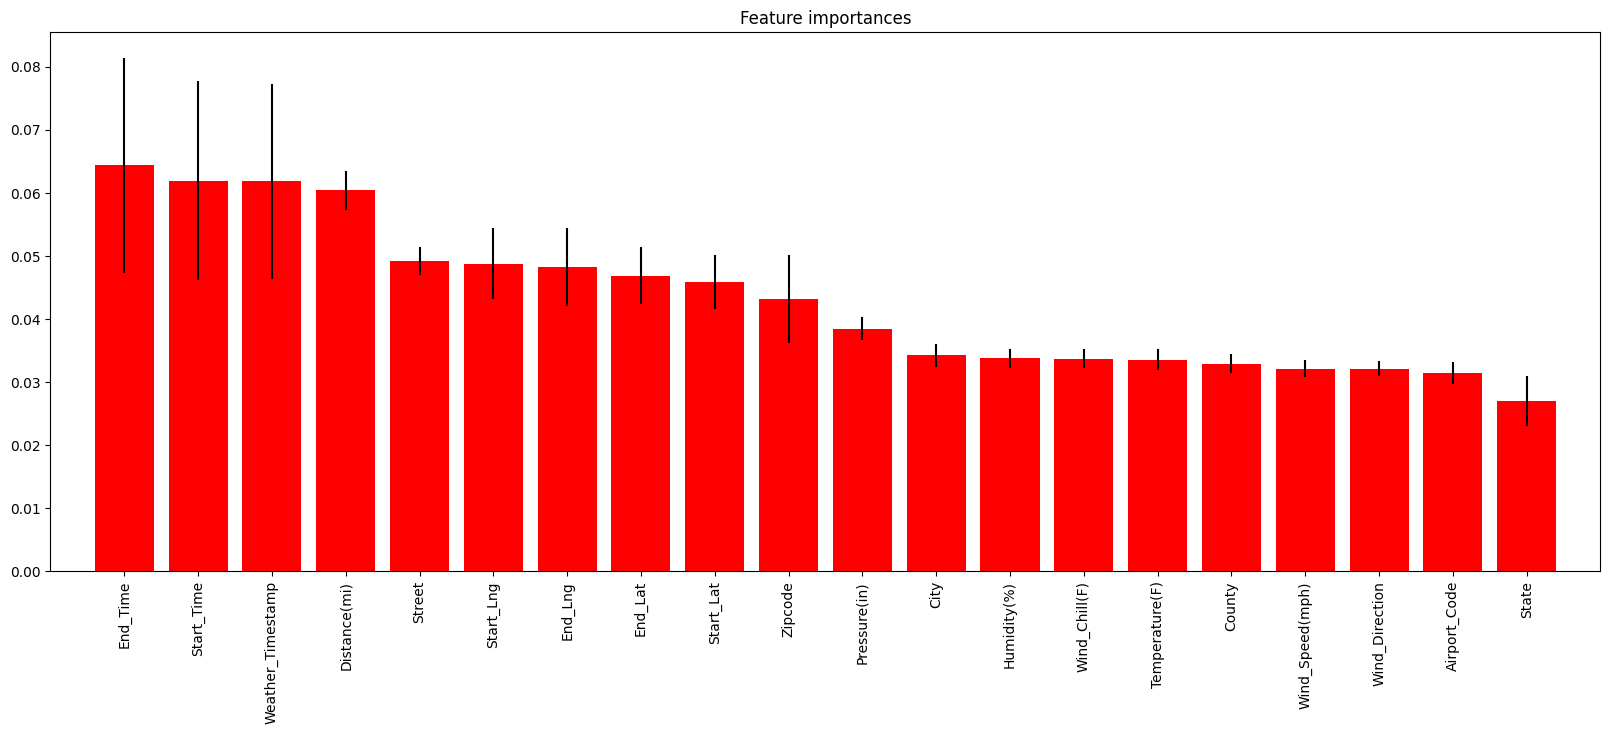

In [40]:
from sklearn import ensemble

model = ensemble.ExtraTreesRegressor(n_estimators=25, max_depth=30, max_features=0.3, n_jobs=-1, random_state=0)
model.fit(train_col,train_y)


importance = model.feature_importances_
std = np.std([tree.feature_importances_ for tree in model.estimators_],axis=0)
indices = np.argsort(importance)[::-1][:20]

plt.figure(figsize=(20,7))
plt.title("Feature importances")
plt.bar(range(len(indices)), importance[indices], color="r", yerr=std[indices], align="center")
plt.xticks(range(len(indices)), fearture_name[indices], rotation='vertical')
plt.xlim([-1, len(indices)])
plt.show()

## Train Test Split

In [41]:
y = df2['Severity'].copy()
X = df2.drop('Severity', axis=1).copy()

In [42]:
y.unique()

array([2, 1, 4, 3])

In [43]:
y = y-1

In [44]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [45]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [46]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=100)

In [47]:
X_train.shape

(183941, 43)

## Models

In [48]:
import tensorflow as tf
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout

### Model 1

In [49]:
inputs = tf.keras.Input(shape=(X.shape[1],))
x = tf.keras.layers.Dense(64, activation='relu')(inputs)
x = tf.keras.layers.Dense(64, activation='relu')(x)
x = tf.keras.layers.Dense(64, activation='relu')(x)
outputs = tf.keras.layers.Dense(4, activation='softmax')(x)

model = tf.keras.Model(inputs, outputs)

model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

batch_size = 40
epochs = 100

history = model.fit(
    X_train,
    y_train,
    validation_split=0.2,
    batch_size=batch_size,


    epochs=epochs,
    callbacks=[
        tf.keras.callbacks.ReduceLROnPlateau(),
        tf.keras.callbacks.EarlyStopping(
            monitor='val_loss',
            patience=3,
            restore_best_weights=True
        )
    ]
)

Epoch 1/100
3679/3679 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - accuracy: 0.9322 - loss: 0.2513 - val_accuracy: 0.9429 - val_loss: 0.2006 - learning_rate: 0.0010
Epoch 2/100
3679/3679 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.9456 - loss: 0.1885 - val_accuracy: 0.9453 - val_loss: 0.1886 - learning_rate: 0.0010
Epoch 3/100
3679/3679 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - accuracy: 0.9471 - loss: 0.1798 - val_accuracy: 0.9457 - val_loss: 0.1864 - learning_rate: 0.0010
Epoch 4/100
3679/3679 ━━━━━━━━━━━━━━━━━━━━ 13s 3ms/step - accuracy: 0.9486 - loss: 0.1741 - val_accuracy: 0.9462 - val_loss: 0.1843 - learning_rate: 0.0010
Epoch 5/100
3679/3679 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - accuracy: 0.9493 - loss: 0.1701 - val_accuracy: 0.9463 - val_loss: 0.1805 - learning_rate: 0.0010
Epoch 6/100
3679/3679 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - accuracy: 0.9496 - loss: 0.1681 - val_accuracy: 0.9462 - val_loss: 0.1819 - learning_rate: 0.0010
Epoch 7/100
3679/3679 ━━━━━━━━━━━━━━━━━━━━ 12s 2ms/step - accuracy:

In [50]:
print("Test Accuracy:", model.evaluate(X_test, y_test, verbose=0)[1])

Test Accuracy: 0.9503979682922363


1438/1438 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step


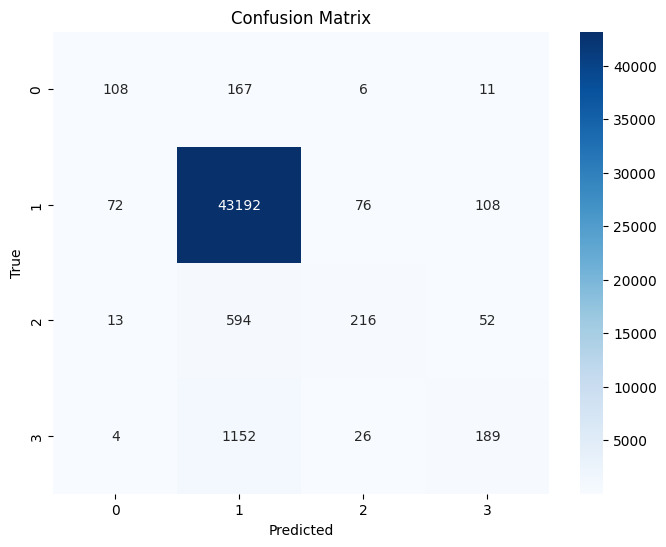

In [51]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns
import pandas as pd

# Predict the classes for X_test
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)  # Get the class with the highest probability

# Assuming y_test is a pandas Series or DataFrame column, convert it if necessary
if isinstance(y_test, pd.DataFrame):
    y_test = y_test.squeeze()  # Convert to Series if it's a DataFrame with a single column

# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred_classes)

# Get the unique class names from y_test
class_names = np.unique(y_test)

# Plot the confusion matrix using a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [52]:
losses=pd.DataFrame(history.history)
losses.head()

,accuracy,loss,val_accuracy,val_loss,learning_rate
0,0.941931,0.211730,0.942918,0.200615,0.001
1,0.946232,0.186162,0.945310,0.188622,0.001
2,0.947163,0.179135,0.945717,0.186426,0.001
3,0.947952,0.175543,0.946152,0.184307,0.001
4,0.948489,0.171843,0.946261,0.180525,0.001


In [53]:
l = pd.DataFrame({'loss':losses['loss'], 'validation_loss':losses['val_loss']})

<Axes: >

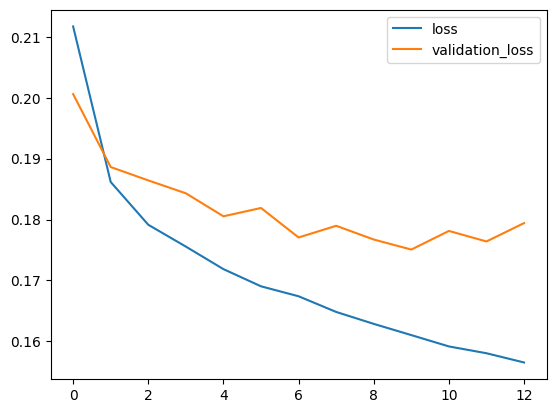

In [54]:
l.plot()

### Model 2

In [55]:
inputs = tf.keras.Input(shape=(X.shape[1],))
x = tf.keras.layers.Dense(64, activation='relu')(inputs)
x = tf.keras.layers.Dense(64, activation='relu')(x)
x = tf.keras.layers.Dense(64, activation='relu')(x)
outputs = tf.keras.layers.Dense(4, activation='softmax')(x)

model = tf.keras.Model(inputs, outputs)

model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

batch_size = 32
epochs = 100

history = model.fit(
    X_train,
    y_train,
    validation_split=0.2,
    batch_size=batch_size,
    epochs=epochs,
    callbacks=[
        tf.keras.callbacks.ReduceLROnPlateau()
    ]
)

Epoch 1/100
4599/4599 ━━━━━━━━━━━━━━━━━━━━ 12s 2ms/step - accuracy: 0.9350 - loss: 0.2421 - val_accuracy: 0.9437 - val_loss: 0.1999 - learning_rate: 0.0010
Epoch 2/100
4599/4599 ━━━━━━━━━━━━━━━━━━━━ 11s 2ms/step - accuracy: 0.9455 - loss: 0.1878 - val_accuracy: 0.9449 - val_loss: 0.1884 - learning_rate: 0.0010
Epoch 3/100
4599/4599 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step - accuracy: 0.9482 - loss: 0.1777 - val_accuracy: 0.9454 - val_loss: 0.1843 - learning_rate: 0.0010
Epoch 4/100
4599/4599 ━━━━━━━━━━━━━━━━━━━━ 13s 2ms/step - accuracy: 0.9490 - loss: 0.1730 - val_accuracy: 0.9461 - val_loss: 0.1812 - learning_rate: 0.0010
Epoch 5/100
4599/4599 ━━━━━━━━━━━━━━━━━━━━ 18s 2ms/step - accuracy: 0.9492 - loss: 0.1694 - val_accuracy: 0.9465 - val_loss: 0.1813 - learning_rate: 0.0010
Epoch 6/100
4599/4599 ━━━━━━━━━━━━━━━━━━━━ 11s 2ms/step - accuracy: 0.9490 - loss: 0.1691 - val_accuracy: 0.9440 - val_loss: 0.1814 - learning_rate: 0.0010
Epoch 7/100
4599/4599 ━━━━━━━━━━━━━━━━━━━━ 12s 2ms/step - accurac

In [56]:
print("Test Accuracy:", model.evaluate(X_test, y_test, verbose=0)[1])

Test Accuracy: 0.9497672915458679


In [57]:
losses=pd.DataFrame(history.history)
l = pd.DataFrame({'loss':losses['loss'], 'validation_loss':losses['val_loss']})

<Axes: >

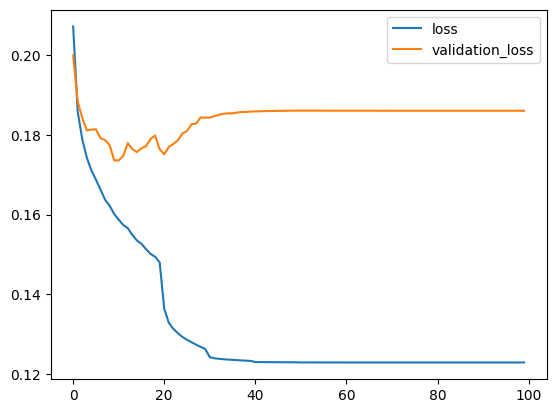

In [58]:
l.plot()

1438/1438 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step


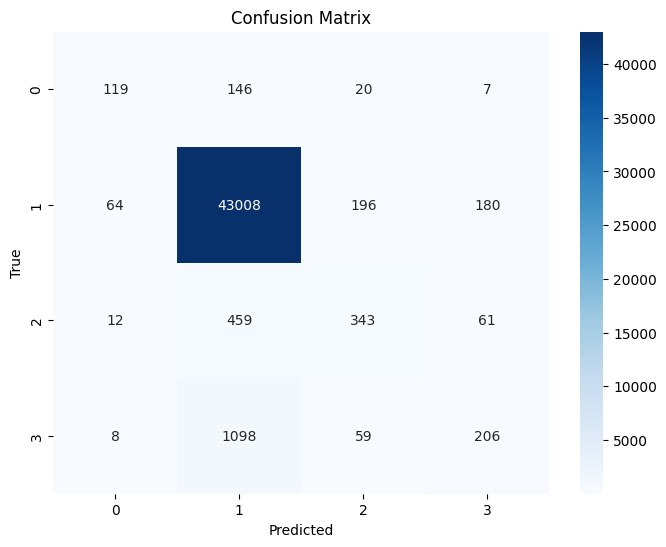

In [59]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns
import pandas as pd

# Predict the classes for X_test
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)  # Get the class with the highest probability

# Assuming y_test is a pandas Series or DataFrame column, convert it if necessary
if isinstance(y_test, pd.DataFrame):
    y_test = y_test.squeeze()  # Convert to Series if it's a DataFrame with a single column

# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred_classes)

# Get the unique class names from y_test
class_names = np.unique(y_test)

# Plot the confusion matrix using a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


In [60]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, log_loss
from sklearn.preprocessing import StandardScaler

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature scaling (optional, but can improve performance in many models)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Create the Random Forest model
model = RandomForestClassifier(
    n_estimators=100,  # Number of trees in the forest
    max_depth=10,      # Maximum depth of each tree
    random_state=42    # Ensure reproducibility
)

# Fit the model on the training data
model.fit(X_train, y_train)

# Make predictions
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

# Evaluate the model
train_accuracy = accuracy_score(y_train, y_pred_train)
test_accuracy = accuracy_score(y_test, y_pred_test)

print(f"Training Accuracy: {train_accuracy:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")

# Detailed classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred_test))

# Calculate log loss on training and testing sets
y_pred_proba_train = model.predict_proba(X_train)
y_pred_proba_test = model.predict_proba(X_test)

train_log_loss = log_loss(y_train, y_pred_proba_train)
test_log_loss = log_loss(y_test, y_pred_proba_test)

print(f"\nTraining Log Loss: {train_log_loss:.4f}")
print(f"Test Log Loss: {test_log_loss:.4f}")



Training Accuracy: 0.9539
Test Accuracy: 0.9514

Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.28      0.42       324
           1       0.95      1.00      0.98     43362
           2       0.69      0.35      0.46       876
           3       0.79      0.06      0.12      1424

    accuracy                           0.95     45986
   macro avg       0.83      0.42      0.50     45986
weighted avg       0.94      0.95      0.94     45986


Training Log Loss: 0.1365
Test Log Loss: 0.1507


In [61]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, log_loss
from sklearn.preprocessing import StandardScaler

# Splitting the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scaling the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Logistic Regression Model
model = LogisticRegression(max_iter=200, random_state=42)

# Fitting the model
model.fit(X_train, y_train)

# Predictions
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

# Probabilities for loss calculation
y_prob_train = model.predict_proba(X_train)
y_prob_test = model.predict_proba(X_test)

# Evaluation
train_accuracy = accuracy_score(y_train, y_pred_train)
test_accuracy = accuracy_score(y_test, y_pred_test)
train_loss = log_loss(y_train, y_prob_train)
test_loss = log_loss(y_test, y_prob_test)

print(f"Training Accuracy: {train_accuracy:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")
print(f"Training Loss: {train_loss:.4f}")
print(f"Test Loss: {test_loss:.4f}")

print("\nClassification Report:")
print(classification_report(y_test, y_pred_test))


Training Accuracy: 0.9420
Test Accuracy: 0.9427
Training Loss: 0.2010
Test Loss: 0.2003

Classification Report:
              precision    recall  f1-score   support

           0       0.75      0.01      0.02       324
           1       0.95      1.00      0.97     43362
           2       0.39      0.09      0.15       876
           3       0.57      0.00      0.01      1424

    accuracy                           0.94     45986
   macro avg       0.66      0.27      0.28     45986
weighted avg       0.92      0.94      0.92     45986



In [62]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, hinge_loss
from sklearn.preprocessing import StandardScaler

# Splitting the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scaling the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# SVM Model
model = SVC(kernel='rbf', random_state=42)

# Fitting the model
model.fit(X_train, y_train)

# Predictions
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

# Evaluation
train_accuracy = accuracy_score(y_train, y_pred_train)
test_accuracy = accuracy_score(y_test, y_pred_test)

# Calculate hinge loss for training and test sets
train_hinge_loss = hinge_loss(y_train, model.decision_function(X_train))
test_hinge_loss = hinge_loss(y_test, model.decision_function(X_test))

# Display results
print(f"Training Accuracy: {train_accuracy:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")
print(f"Training Hinge Loss: {train_hinge_loss:.4f}")
print(f"Test Hinge Loss: {test_hinge_loss:.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred_test))


Training Accuracy: 0.9452
Test Accuracy: 0.9455
Training Hinge Loss: 0.1308
Test Hinge Loss: 0.1338

Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.19      0.31       324
           1       0.95      1.00      0.97     43362
           2       0.73      0.09      0.16       876
           3       0.80      0.00      0.01      1424

    accuracy                           0.95     45986
   macro avg       0.83      0.32      0.36     45986
weighted avg       0.94      0.95      0.92     45986



In [63]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, log_loss
from sklearn.preprocessing import StandardScaler

# Splitting the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scaling the data (optional but can be helpful)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# XGBoost Model
model = xgb.XGBClassifier(
    n_estimators=100,  # Number of boosting rounds
    max_depth=6,       # Maximum depth of a tree
    learning_rate=0.1, # Step size for each iteration
    random_state=42
)

# Fitting the model
model.fit(X_train, y_train)

# Predictions for accuracy
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

# Predictions for log loss (probability predictions)
y_pred_train_proba = model.predict_proba(X_train)
y_pred_test_proba = model.predict_proba(X_test)

# Evaluation
train_accuracy = accuracy_score(y_train, y_pred_train)
test_accuracy = accuracy_score(y_test, y_pred_test)

# Log loss evaluation
train_log_loss = log_loss(y_train, y_pred_train_proba)
test_log_loss = log_loss(y_test, y_pred_test_proba)

print(f"Training Accuracy: {train_accuracy:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")
print(f"Training Log Loss: {train_log_loss:.4f}")
print(f"Test Log Loss: {test_log_loss:.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred_test))

Training Accuracy: 0.9567
Test Accuracy: 0.9534
Training Log Loss: 0.1310
Test Log Loss: 0.1449

Classification Report:
              precision    recall  f1-score   support

           0       0.72      0.35      0.47       324
           1       0.96      1.00      0.98     43362
           2       0.64      0.40      0.49       876
           3       0.72      0.15      0.25      1424

    accuracy                           0.95     45986
   macro avg       0.76      0.47      0.55     45986
weighted avg       0.94      0.95      0.94     45986



In [64]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, log_loss
from sklearn.preprocessing import StandardScaler

# Splitting the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scaling the data (optional, decision trees don't necessarily need feature scaling)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Decision Tree Model
model = DecisionTreeClassifier(
    criterion='gini',  # 'gini' or 'entropy'
    max_depth=10,      # Maximum depth of the tree
    random_state=42
)

# Fitting the model
model.fit(X_train, y_train)

# Predictions
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

# Predicted probabilities
y_pred_prob_train = model.predict_proba(X_train)
y_pred_prob_test = model.predict_proba(X_test)

# Evaluation
train_accuracy = accuracy_score(y_train, y_pred_train)
test_accuracy = accuracy_score(y_test, y_pred_test)

# Log loss
train_log_loss = log_loss(y_train, y_pred_prob_train)
test_log_loss = log_loss(y_test, y_pred_prob_test)

print(f"Training Accuracy: {train_accuracy:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")
print(f"Training Log Loss: {train_log_loss:.4f}")
print(f"Test Log Loss: {test_log_loss:.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred_test))


Training Accuracy: 0.9565
Test Accuracy: 0.9501
Training Log Loss: 0.1398
Test Log Loss: 0.2649

Classification Report:
              precision    recall  f1-score   support

           0       0.64      0.41      0.50       324
           1       0.96      0.99      0.98     43362
           2       0.57      0.44      0.50       876
           3       0.50      0.17      0.25      1424

    accuracy                           0.95     45986
   macro avg       0.67      0.50      0.56     45986
weighted avg       0.94      0.95      0.94     45986

